In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd
import scipy.stats as stats

import json

In [104]:
chi2_null = 110.97260423789604

In [105]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

# 1D Data

In [106]:
with open('data/100_Omega_l_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OL = pd.DataFrame.from_dict(out)

df_OL['Ratio'].replace([np.inf], df_OL['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OL = df_OL.fillna(df_OL['Ratio'].replace(np.inf, np.nan).max())

df_OL['Ratio'] = np.exp(-0.5*df_OL['Ratio'])

In [107]:
with open('data/100_Omega_m_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OM = pd.DataFrame.from_dict(out)

df_OM['Ratio'].replace([np.inf], df_OM['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OM = df_OM.fillna(df_OM['Ratio'].replace(np.inf, np.nan).max())

df_OM['Ratio'] = np.exp(-0.5*df_OM['Ratio'])

In [108]:
with open('data/100_w_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_w = pd.DataFrame.from_dict(out)

df_w['Ratio'].replace([np.inf], df_w['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_w = df_w.fillna(df_w['Ratio'].replace(np.inf, np.nan).max())

df_w['Ratio'] = np.exp(-0.5*df_w['Ratio'])
print(df_w['w'].min())

df_w['w'] = df_w['w']/df_w['w'].min()

-3.0


In [109]:
with open('data/200_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_H = pd.DataFrame.from_dict(out)

df_H['Ratio'].replace([np.inf], df_H['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_H = df_H.fillna(df_H['Ratio'].replace(np.inf, np.nan).max())

df_H['Ratio'] = np.exp(-0.5*df_H['Ratio'])
print(df_H['Hubble'].max())
df_H['Hubble'] = df_H['Hubble']/df_H['Hubble'].max()

100.0


# 2D Data

In [83]:
with open('data/100_Omega_l_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OL_H = pd.DataFrame.from_dict(out)

df_OL_H['Ratio'].replace([np.inf], df_OL_H['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OL_H['Hubble'] = df_OL_H['Hubble']/df_OL_H['Hubble'].max()

In [84]:
with open('data/100_Omega_m_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OM_H = pd.DataFrame.from_dict(out)

df_OM_H['Ratio'].replace([np.inf], df_OM_H['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OM_H['Hubble'] = df_OM_H['Hubble']/df_OM_H['Hubble'].max()

In [85]:
with open('data/100_w_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_w_H = pd.DataFrame.from_dict(out)

df_w_H['Ratio'].replace([np.inf], df_w_H['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_w_H['Hubble'] = df_w_H['Hubble']/df_w_H['Hubble'].max()
df_w_H['w'] = df_w_H['w']/df_w_H['w'].min()

In [86]:
with open('data/100_Omega_l_Omega_m_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OL_OM = pd.DataFrame.from_dict(out)

df_OL_OM['Ratio'].replace([np.inf], df_OL_OM['Ratio'].replace(np.inf, np.nan).max(), inplace=True)

In [87]:
with open('data/100_Omega_l_w_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OL_w = pd.DataFrame.from_dict(out)

df_OL_w['Ratio'].replace([np.inf], df_OL_w['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OL_w['w'] = df_OL_w['w']/df_OL_w['w'].min()

In [88]:
with open('data/100_Omega_m_w_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df_OM_w = pd.DataFrame.from_dict(out)

df_OM_w['Ratio'].replace([np.inf], df_OM_w['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df_OM_w['w'] = df_OM_w['w']/df_OM_w['w'].min()

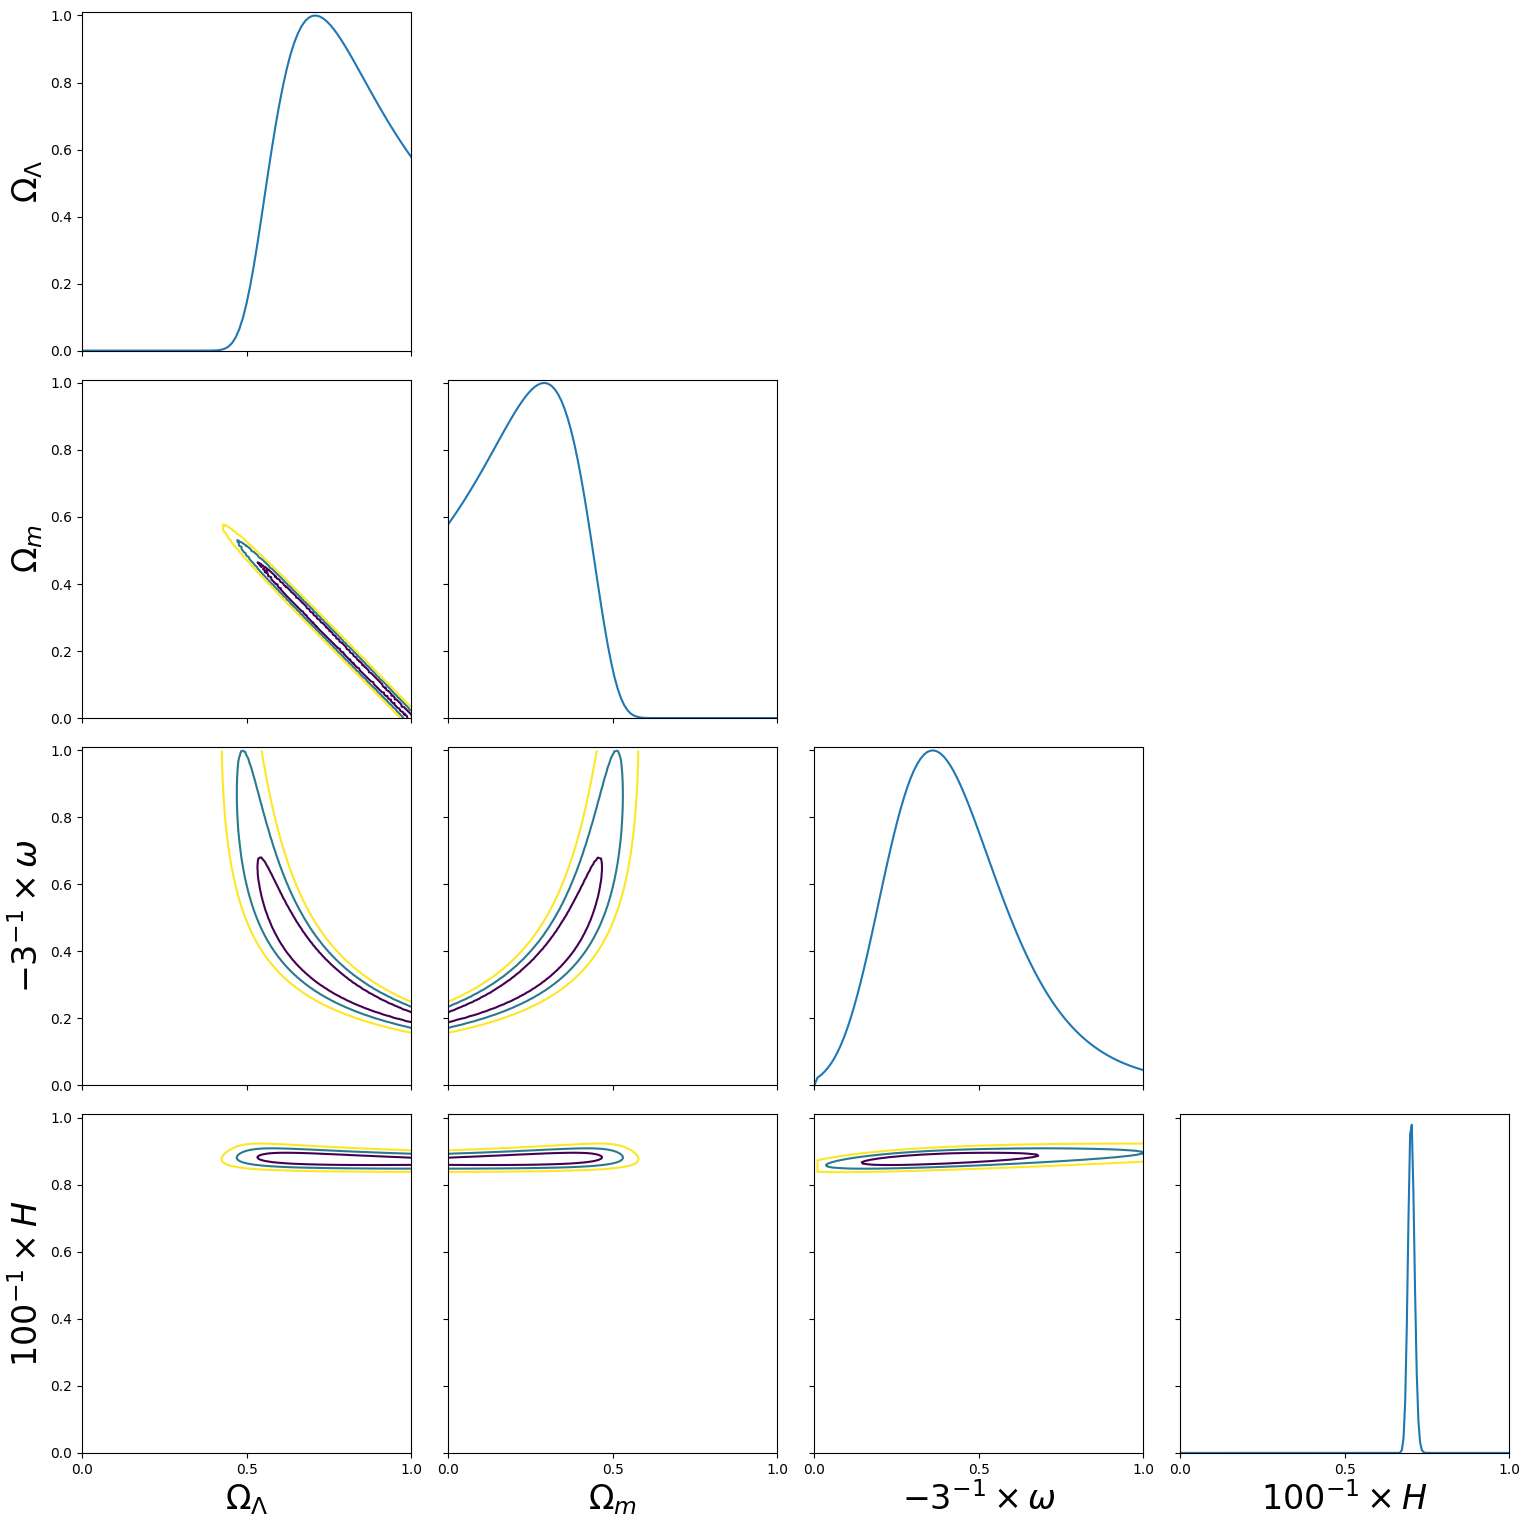

In [119]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True)

fig.tight_layout()

axs[0,0].set_xlim([0,1])
axs[0, 0].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[0,0].set_ylim([0,1.01])

# add your plots to the subplots
axs[0, 0].plot(df_OL.Omega_l, df_OL.Ratio)

axs[1, 1].plot(df_OM.Omega_m, df_OM.Ratio)
axs[2, 2].plot(df_w.w, df_w.Ratio)
axs[3, 3].plot(df_H.Hubble, df_H.Ratio)
axs[1, 0].tricontour(df_OL_OM.Omega_l, df_OL_OM.Omega_m, df_OL_OM.Ratio, levels = [lambda1, lambda2, lambda3])

axs[2, 0].tricontour(df_OL_w.Omega_l, df_OL_w.w, df_OL_w.Ratio, levels = [lambda1, lambda2, lambda3])
axs[2, 1].tricontour(df_OM_w.Omega_m, df_OM_w.w, df_OM_w.Ratio, levels = [lambda1, lambda2, lambda3])
axs[3, 0].tricontour(df_OL_H.Omega_l, df_OL_H.Hubble, df_OL_H.Ratio, levels = [lambda1, lambda2, lambda3])
axs[3, 1].tricontour(df_OM_H.Omega_m, df_OM_H.Hubble, df_OM_H.Ratio, levels = [lambda1, lambda2, lambda3])
axs[3, 2].tricontour(df_w_H.w, df_w_H.Hubble, df_w_H.Ratio, levels = [lambda1, lambda2, lambda3])

axs[0, 0].set_ylabel(r'$\Omega_{\Lambda}$', fontsize = 24)
axs[1, 0].set_ylabel(r'$\Omega_{m}$', fontsize = 24)
axs[2, 0].set_ylabel(r'$-3^{-1} \times \omega$', fontsize = 24)
axs[3, 0].set_ylabel(r'$100^{-1} \times H$', fontsize = 24)
axs[3, 0].set_xlabel(r'$\Omega_{\Lambda}$', fontsize = 24)
axs[3, 1].set_xlabel(r'$\Omega_{m}$', fontsize = 24)
axs[3, 2].set_xlabel(r'$-3^{-1} \times \omega$', fontsize = 24)
axs[3, 3].set_xlabel(r'$100^{-1} \times H$', fontsize = 24)

# fig.patch.set_visible(False)
axs[0, 1].axis('off')
axs[0, 2].axis('off')
axs[0, 3].axis('off')
axs[1, 2].axis('off')
axs[1, 3].axis('off')
axs[2, 3].axis('off')

plt.savefig('images/corner_plot_v1.pdf', bbox_inches="tight")

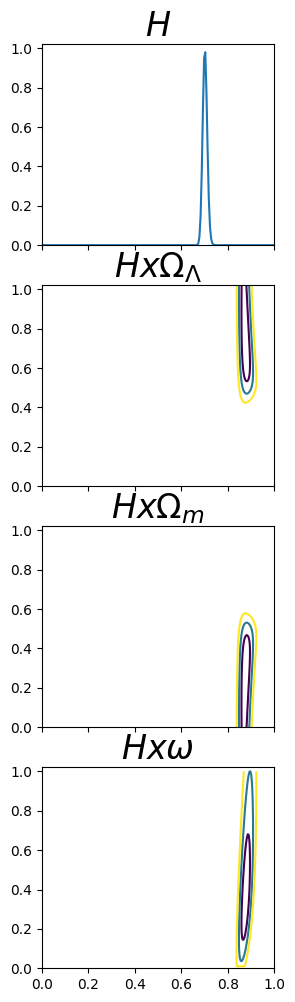

In [120]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(3, 12), sharex=True, sharey = True)

axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1.02])

# add your plots to the subplots
axs[0].plot(df_H.Hubble, df_H.Ratio)
axs[1].tricontour(df_OL_H.Hubble, df_OL_H.Omega_l, df_OL_H.Ratio, levels = [lambda1, lambda2, lambda3])
axs[2].tricontour(df_OM_H.Hubble, df_OM_H.Omega_m,  df_OM_H.Ratio, levels = [lambda1, lambda2, lambda3])
axs[3].tricontour(df_w_H.Hubble, df_w_H.w, df_w_H.Ratio, levels = [lambda1, lambda2, lambda3])

axs[0].set_title('$H$', fontsize = 24)
axs[1].set_title('$H x \Omega_{\Lambda}$', fontsize = 24)
axs[2].set_title('$H x \Omega_{m}$', fontsize = 24)
axs[3].set_title('$H x \omega$', fontsize = 24)

plt.savefig('images/hubble_strange_values.pdf')  